In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mm = pd.read_csv(mouse_metadata_path)
sr = pd.read_csv(study_results_path)

mm_sr_combined = pd.merge(mm, sr, on="Mouse ID")
mm_sr_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mm_sr_combined["Mouse ID"].nunique()

249

In [3]:
duplicated = mm_sr_combined.loc[mm_sr_combined.duplicated(["Mouse ID", "Timepoint"])]
duplicated1 = duplicated["Mouse ID"].unique()
duplicated1

array(['g989'], dtype=object)

In [4]:
duplicateddata = mm_sr_combined.loc[mm_sr_combined.duplicated(["Mouse ID", "Timepoint"])]
duplicateddata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
cleandata = mm_sr_combined.loc[mm_sr_combined["Mouse ID"] != "g989", :]
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
cleandata["Mouse ID"].nunique()

248

In [7]:
cleandata["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
#Create new DF
tumor = cleandata[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor = tumor.set_index(["Drug Regimen"])
#capomulin series
capomulin = tumor.loc["Capomulin", "Tumor Volume (mm3)"]
capotumor = pd.DataFrame(capomulin)
capostats = capotumor["Tumor Volume (mm3)"]
capomulinmean = np.mean(capostats)
capomulinmed = np.median(capostats)
capomulinvar = np.var(capostats)
capomulinstd = np.std(capostats)
capomulinsem = sem(capostats)

#ceftamin series
ceftamin = tumor.loc["Ceftamin", "Tumor Volume (mm3)"]
cefttumor = pd.DataFrame(ceftamin)
ceftstats = cefttumor["Tumor Volume (mm3)"]
ceftmean = np.mean(ceftstats)
ceftmed = np.median(ceftstats)
ceftvar = np.var(ceftstats)
ceftstd = np.std(ceftstats)
ceftsem = sem(ceftstats)

#infubinol series
infubinol = tumor.loc["Infubinol", "Tumor Volume (mm3)"]
inftumor = pd.DataFrame(infubinol)
infstats = inftumor["Tumor Volume (mm3)"]
infmean = np.mean(infstats)
infmed = np.median(infstats)
infvar = np.var(infstats)
infstd = np.std(infstats)
infsem = sem(infstats)

#ketapril series
ketapril = tumor.loc["Ketapril", "Tumor Volume (mm3)"]
kettumor = pd.DataFrame(ketapril)
ketstats = kettumor["Tumor Volume (mm3)"]
ketmean = np.mean(ketstats)
ketmed = np.median(ketstats)
ketvar = np.var(ketstats)
ketstd = np.std(ketstats)
ketsem = sem(ketstats)


#naftisol series
naftisol = tumor.loc["Naftisol", "Tumor Volume (mm3)"]
naftumor = pd.DataFrame(naftisol)
nafstats = naftumor["Tumor Volume (mm3)"]
nafmean = np.mean(nafstats)
nafmed = np.median(nafstats)
nafvar = np.var(nafstats)
nafstd = np.std(nafstats)
nafsem = sem(nafstats)


#placebo series
placebo = tumor.loc["Placebo", "Tumor Volume (mm3)"]
plactumor = pd.DataFrame(placebo)
placstats = plactumor["Tumor Volume (mm3)"]
placmean = np.mean(placstats)
placmed = np.median(placstats)
placvar = np.var(placstats)
placstd = np.std(placstats)
placsem = sem(placstats)


#propriva series
propriva = tumor.loc["Propriva", "Tumor Volume (mm3)"]
protumor = pd.DataFrame(propriva)
prostats = protumor["Tumor Volume (mm3)"]
promean = np.mean(prostats)
promed = np.median(prostats)
provar = np.var(prostats)
prostd = np.std(prostats)
prosem = sem(prostats)


#ramicane series
ramicane = tumor.loc["Ramicane", "Tumor Volume (mm3)"]
ramtumor = pd.DataFrame(ramicane)
ramstats = ramtumor["Tumor Volume (mm3)"]
rammean = np.mean(ramstats)
rammed = np.median(ramstats)
ramvar = np.var(ramstats)
ramstd = np.std(ramstats)
ramsem = sem(ramstats)


#stelasyn series
stelasyn = tumor.loc["Stelasyn", "Tumor Volume (mm3)"]
steltumor = pd.DataFrame(stelasyn)
stelstats = steltumor["Tumor Volume (mm3)"]
stelmean = np.mean(stelstats)
stelmed = np.median(stelstats)
stelvar = np.var(stelstats)
stelstd = np.std(stelstats)
stelsem = sem(stelstats)


#zoniferol series
zoniferol = tumor.loc["Zoniferol", "Tumor Volume (mm3)"]
zontumor = pd.DataFrame(zoniferol)
zonstats = zontumor["Tumor Volume (mm3)"]
zonmean = np.mean(zonstats)
zonmed = np.median(zonstats)
zonvar = np.var(zonstats)
zonstd = np.std(zonstats)
zonsem = sem(zonstats)

#Make a list of dictionaries
lofd = [{"Drug": "Capomulin", "Mean": capomulinmean,
"Median": capomulinmed,
"Variance": capomulinvar,
"Standard Deviation": capomulinstd,
"Standard Error": capomulinsem
}, {"Drug": "Ceftamin", "Mean": ceftmean,
"Median": ceftmed,
"Variance": ceftvar,
"Standard Deviation": ceftstd,
"Standard Error": ceftsem
}, {"Drug": "Infubinol", "Mean": infmean,
"Median": infmed,
"Variance": infvar,
"Standard Deviation": infstd,
"Standard Error": infsem
}, {"Drug": "Ketapril", "Mean": ketmean,
"Median": ketmed,
"Variance": ketvar,
"Standard Deviation": ketstd,
"Standard Error": ketsem},
{"Drug": "Naftisol", "Mean": nafmean,
"Median": nafmed,
"Variance": nafvar,
"Standard Deviation": nafstd,
"Standard Error": nafsem},
{"Drug": "Placebo", "Mean": placmean,
"Median": placmed,
"Variance": placvar,
"Standard Deviation": placstd,
"Standard Error": placsem},
{"Drug": "Propriva", "Mean": promean,
"Median": promed,
"Variance": provar,
"Standard Deviation": prostd,
"Standard Error": prosem},
{"Drug": "Ramicane", "Mean": rammean,
"Median": rammed,
"Variance": ramvar,
"Standard Deviation": ramstd,
"Standard Error": ramsem},
{"Drug": "Stelasyn", "Mean": stelmean,
"Median": stelmed,
"Variance": stelvar,
"Standard Deviation": stelstd,
"Standard Error": stelsem},
{"Drug": "Zoniferol", "Mean": zonmean,
"Median": zonmed,
"Variance": zonvar,
"Standard Deviation": zonstd,
"Standard Error": zonsem}
]
#Convert to DF
lofd_df = pd.DataFrame(lofd)
#Change Index to "Drug"
lofd_df = lofd_df.set_index(["Drug"])
#Show DF
lofd_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [9]:
#Create Drug Regimen Summary Table with one groupby
tumor = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
tumor

/Users/niquedunning/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/niquedunning/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/niquedunning/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

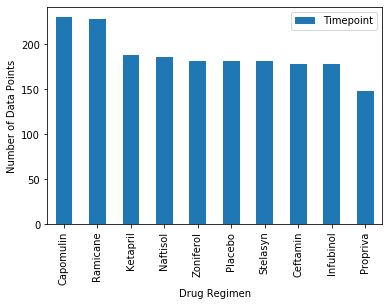

In [10]:
ratsbar = cleandata[["Drug Regimen", "Timepoint"]]
ratsbar1= ratsbar.groupby(["Drug Regimen"]).count()
ratsbar1["Drug Regimen"] = ratsbar1.index 
ratsbar2 = ratsbar1.sort_values(by = "Timepoint", ascending=False)
ratsbar2.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

In [11]:
ratsbar2["Drug Regimen"].unique()

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype=object)

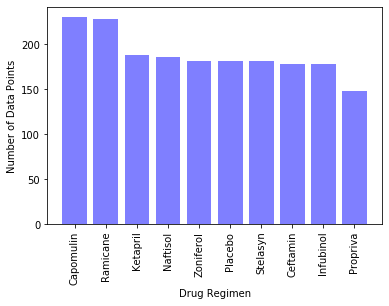

In [12]:

x_axis = np.arange(len(ratsbar2))
tix = [value for value in x_axis]
ticks = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']



plt.bar(x_axis, ratsbar2["Timepoint"], color = "b", alpha= .5, align="center")
plt.xticks(tix, ticks, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

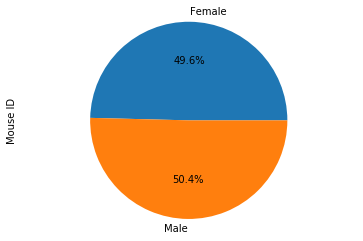

In [13]:
genderrat = cleandata[["Mouse ID","Sex"]]
genderrat1 = genderrat.drop_duplicates(keep ="last")
genderrat2 = genderrat1.groupby(["Sex"]).count()
count = genderrat2["Mouse ID"].sum()
genderrat3 = genderrat2["Mouse ID"] / count

genderplot = genderrat3.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")

plt.show()

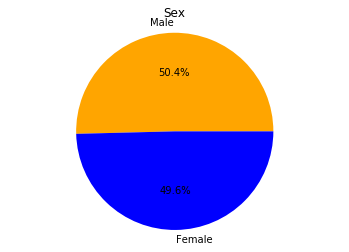

In [14]:
labels = ["Male", "Female"]

counts = [125,123]

colors = ["orange", "blue"]

explode = (0, 0 )

plt.pie(counts, 
        explode=explode, 
        labels=labels,
        colors=colors,
        autopct="%1.1f%%")

plt.axis("equal")
plt.title("Sex")

plt.show()

In [15]:
mousesorter = cleandata.sort_values(by= ["Timepoint"], ascending = False)
mousesorter1 = mousesorter.drop_duplicates(["Mouse ID"], keep="first")

mousesorter1 = mousesorter1[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
mousesorter2 = mousesorter1.sort_values(["Mouse ID"], ascending = True)

In [43]:
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tvlist = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in druglist:
    
    tvseries = mousesorter2.loc[mousesorter2["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tvlist.append(tvseries)
    
    


    quartiles = tvseries.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)

    print(f" {drug}'s potential outliers: Series({tvseries[(tvseries < lowerb) | (tvseries > upperb)]}")
    

 Capomulin's potential outliers: Series(Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's potential outliers: Series(Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potential outliers: Series(669    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin's potential outliers: Series(Series([], Name: Tumor Volume (mm3), dtype: float64)


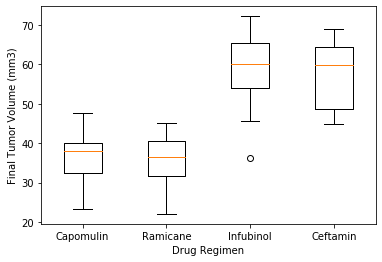

In [53]:
data = tvlist
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
ax1.set_xticklabels(druglist)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

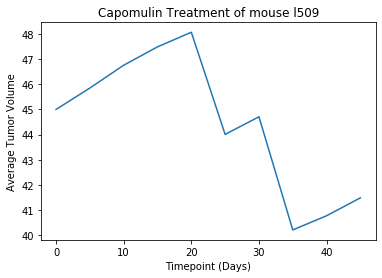

In [19]:
mouse1 = cleandata.loc[cleandata["Mouse ID"] == "l509", : ]
mouse2 = mouse1[["Timepoint", "Tumor Volume (mm3)"]]
x_axis = mouse2["Timepoint"]
y_axis = mouse2["Tumor Volume (mm3)"]
mouse3 = plt.plot(x_axis, y_axis)

plt.xlabel("Timepoint (Days)") 
# naming th"e y axis 
plt.ylabel("Average Tumor Volume") 
  
# giving a title to my graph 
plt.title("Capomulin Treatment of mouse l509") 
  
# function to show the plot 
plt.show() 

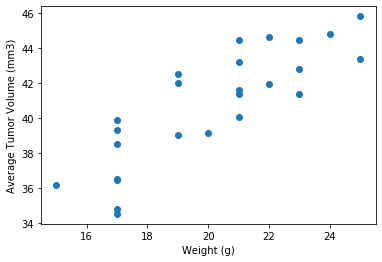

In [20]:
mousescat = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin", : ]
mousescat1 = mousescat[["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]]
count = mousescat1["Mouse ID"].value_counts()
countdf = pd.DataFrame(count)
mousescat2 = mousescat1.groupby(["Mouse ID"]).sum()
y_axis = mousescat2["Tumor Volume (mm3)"] / countdf["Mouse ID"]
x_axis = mousescat2["Weight (g)"] / countdf["Mouse ID"]

plot = plt.scatter(x_axis, y_axis)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

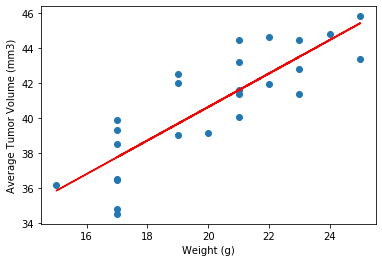

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress = x_axis * slope + intercept
plot = plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()